## 선형회귀 구현하기

### Numpy로 선형회귀 구현하기

#### 패키지 불러오기

In [ ]:
import numpy as np

#### 데이터 로딩

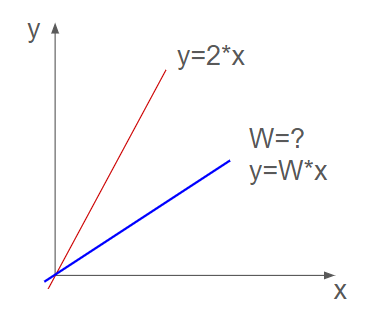

In [ ]:
x_train = np.array([[1], [2], [3]])
y_train = np.array([[2], [4], [6]])

print(x_train)
print(y_train)

#### 가중치 초기화

In [ ]:
W = np.zeros(1)
print(W)

#### 가설 수립

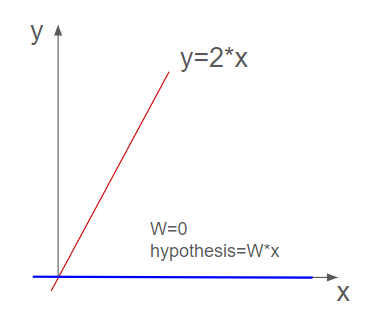

In [ ]:
hypothesis = W * x_train
print(hypothesis)

#### 비용함수 계산

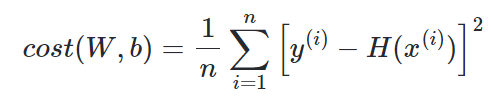

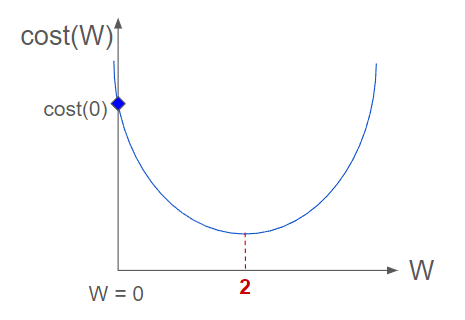

In [ ]:
cost = np.mean((hypothesis - y_train) ** 2)
print(cost)

#### 경사하강법 구현

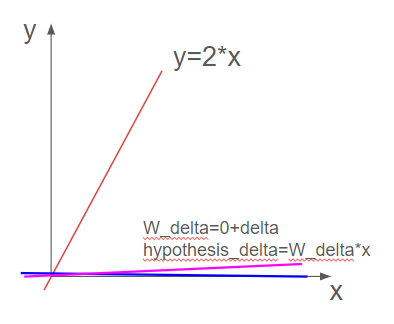

In [ ]:
delta = 0.001

hypothesis_delta =  ( W + delta ) * x_train

print(hypothesis_delta)

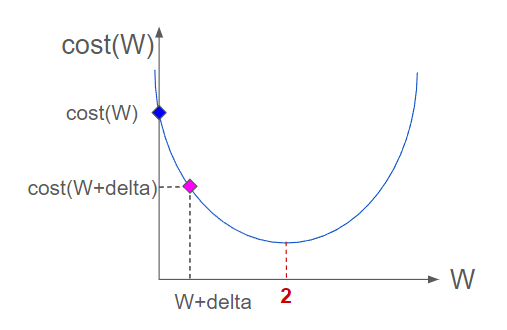

In [ ]:
cost_delta = np.mean((hypothesis_delta - y_train) ** 2)

print(cost_delta)

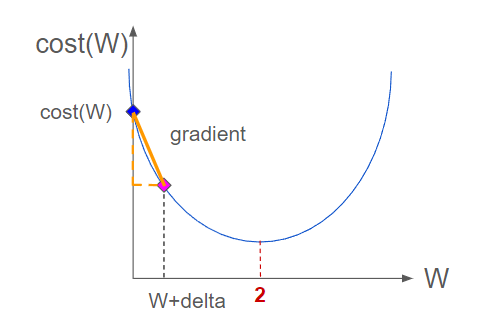

In [ ]:
gradient = (cost_delta - cost) / delta

print(gradient)

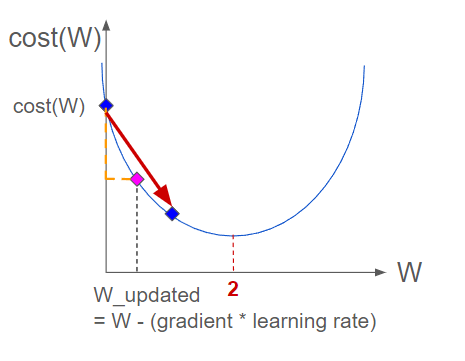

In [ ]:
learing_rate = 0.01

W_updated = W - gradient * learing_rate

print(W_updated)

#### 코드 정리 및 반복 학습

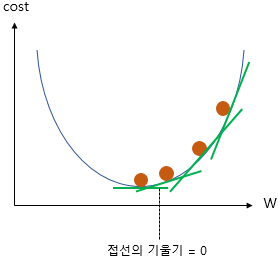

In [ ]:
# 데이터 로딩
x_train = np.array([[1], [2], [3]])
y_train = np.array([[2], [4], [6]])

# 모델(가중치) 초기화
W = np.zeros(1)

# 학습률 설정
learing_rate = 0.01

# 경사하강법 반복
epoch_size = 2000
for epoch in range(epoch_size + 1):

    # 가설 계산
    hypothesis = W * x_train

    # cost 계산
    cost = np.mean((hypothesis - y_train) ** 2)

    # 경사하강법 수행
    delta = 0.001

    hypothesis_delta =  ( W + delta ) * x_train

    cost_delta = np.mean((hypothesis_delta - y_train) ** 2)

    gradient = (cost_delta - cost) / delta

    # 모델 개선
    W = W - gradient * learing_rate

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, epoch_size, W.item(), b.item(), cost
            ))


최종 산출물

In [ ]:
print(W)

----------
실습 종료 #3

### Pytorch로 선형회귀 구현하기

#### 데이터 로딩

In [ ]:
# import numpy as np
import torch
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

#### 변수 선언

In [ ]:
# x_train = np.array([[1], [2], [3]])
# y_train = np.array([[2], [4], [6]])

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(x_train)
print(y_train)

y = 2 * x + 0

#### 가중치 초기화

In [ ]:
# W = np.zeros(1)

W = torch.zeros(1, requires_grad=True)

print(W)

In [ ]:
# b = np.zeros(1)

b = torch.zeros(1, requires_grad=True)

print(b)

y = 0 * x + 0

#### 가설 수립

y = W * x + b

In [ ]:
# hypothesis = x_train * W + b

hypothesis = x_train * W + b

print(hypothesis)

#### 비용함수 계산

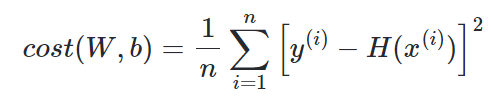

In [ ]:
# cost = np.mean((hypothesis - y_train) ** 2)

cost = torch.mean((hypothesis - y_train) ** 2)

print(cost)

#### 경사하강법 구현

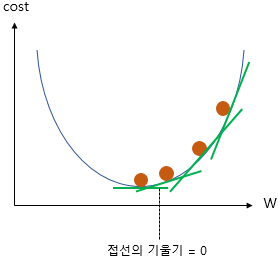

numpy 버전
```python
# 경사하강법 수행
delta = 0.001

hypothesis_delta_W =  ( W + delta ) * x_train + b
hypothesis_delta_b =  W * x_train + ( b + delta )

cost_delta_W = np.mean((hypothesis_delta_W - y_train) ** 2)
cost_delta_b = np.mean((hypothesis_delta_b - y_train) ** 2)

gradient_W = (cost_delta_W - cost) / delta
gradient_b = (cost_delta_b - cost) / delta

# 모델 개선
learing_rate = 0.01

W = W - gradient_W * learing_rate
b = b - gradient_b * learing_rate
```

In [ ]:
# 경사하강법 준비
optimizer = optim.SGD([W, b], lr=0.01)

# gradient를 0으로 초기화 (누적되기 때문)
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산
cost.backward()
# W와 b를 업데이트
optimizer.step()

In [ ]:
print(W)
print(b)

#### 코드 정리 및 반복 학습

In [ ]:
# 데이터 로딩
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델(가중치) 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

# 경사하강법 반복
epoch_size = 2000
for epoch in range(epoch_size + 1):

    # 가설(H(x)) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # 경사하강법 수행
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, epoch_size, W.item(), b.item(), cost.item()
        ))


numpy 결과

```
Epoch    0/2000 W: 0.187, b: 0.080 Cost: 18.666667
Epoch  100/2000 W: 1.745, b: 0.579 Cost: 0.048302
Epoch  200/2000 W: 1.799, b: 0.456 Cost: 0.029951
Epoch  300/2000 W: 1.842, b: 0.359 Cost: 0.018589
Epoch  400/2000 W: 1.875, b: 0.283 Cost: 0.011551
Epoch  500/2000 W: 1.901, b: 0.223 Cost: 0.007189
Epoch  600/2000 W: 1.922, b: 0.176 Cost: 0.004482
Epoch  700/2000 W: 1.938, b: 0.139 Cost: 0.002802
Epoch  800/2000 W: 1.951, b: 0.110 Cost: 0.001756
Epoch  900/2000 W: 1.961, b: 0.087 Cost: 0.001105
Epoch 1000/2000 W: 1.969, b: 0.069 Cost: 0.000699
Epoch 1100/2000 W: 1.975, b: 0.055 Cost: 0.000445
Epoch 1200/2000 W: 1.980, b: 0.044 Cost: 0.000285
Epoch 1300/2000 W: 1.984, b: 0.036 Cost: 0.000185
Epoch 1400/2000 W: 1.987, b: 0.029 Cost: 0.000121
Epoch 1500/2000 W: 1.989, b: 0.023 Cost: 0.000080
Epoch 1600/2000 W: 1.991, b: 0.019 Cost: 0.000054
Epoch 1700/2000 W: 1.993, b: 0.016 Cost: 0.000037
Epoch 1800/2000 W: 1.994, b: 0.013 Cost: 0.000026
Epoch 1900/2000 W: 1.995, b: 0.011 Cost: 0.000019
Epoch 2000/2000 W: 1.995, b: 0.009 Cost: 0.000014
```

최종 산출물

In [ ]:
print(W)
print(b)

### AutoGrad 추가 실습해보기

In [ ]:
import torch

In [ ]:
w = torch.tensor(2.0, requires_grad=True)

In [ ]:
y = w**2
z = 2*y + 5

In [ ]:
z.backward()

In [ ]:
print('수식을 w로 미분한 값 : {}'.format(w.grad))

--------------
실습 종료 #4

## 다중 선형회귀 구현하기

### 다중 선형회귀 구현하기 (벡터)

#### 패키지 불러오기

In [ ]:
import torch
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

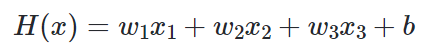

#### 데이터 로딩

In [ ]:
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

#### 가중치 초기화

In [ ]:
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#### 학습

In [ ]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

### 다중 선형회귀 구현하기 (행렬)

#### 패키지 불러오기

In [ ]:
import torch
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

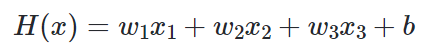

#### 데이터 로딩

In [ ]:
# x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
# x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
# x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])

x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

#### 가중치 초기화

In [ ]:
# w1 = torch.zeros(1, requires_grad=True)
# w2 = torch.zeros(1, requires_grad=True)
# w3 = torch.zeros(1, requires_grad=True)

W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#### 학습

In [ ]:
# optimizer 설정
# optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    #hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), cost.item()
        ))

--------------
실습 종료 #5

## torch.nn.Module로 코드 간소화하기

### 단순 선형 회귀 간소화하기

모델(가중치) 선언 간소화
```python
import torch.nn as nn
model = nn.Linear(input_dim, output_dim)
```

비용 함수 간소화
```python
import torch.nn.functional as F
cost = F.mse_loss(prediction, y_train)
```

#### 패키지 불러오기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

#### 데이터 로딩

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

#### 모델(가중치) 초기화

In [ ]:
# W = torch.zeros(1, requires_grad=True)
# b = torch.zeros(1, requires_grad=True)

model = nn.Linear(1,1)

In [ ]:
# 가중치 확인하기
print(list(model.parameters()))

#### 학습

In [ ]:
# optimizer 설정
# optimizer = optim.SGD([W, b], lr=0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 경사하강법 반복
epoch_size = 2000
for epoch in range(epoch_size + 1):

    # 가설(H(x)) 계산
    #hypothesis = x_train * W + b
    prediction = model(x_train)

    # cost 계산
    # cost = torch.mean((hypothesis - y_train) ** 2)
    cost = F.mse_loss(prediction, y_train)

    # 경사하강법 수행
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, epoch_size, cost.item()
      ))

### 다중 선형 회귀 간소화하기

#### 패키지 불러오기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

#### 데이터 로딩

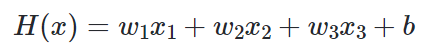

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

#### 모델(가중치) 초기화

In [ ]:
# model = nn.Linear(1,1)
model = nn.Linear(3,1)

In [ ]:
# 가중치 확인하기
print(list(model.parameters()))

#### 학습

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

# 경사하강법 반복
epoch_size = 2000
for epoch in range(epoch_size + 1):

    # 가설(H(x)) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # 경사하강법 수행
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, epoch_size, cost.item()
      ))

In [ ]:
new_var =  torch.FloatTensor([[73, 80, 75]])
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

---------
실습 종료 #6

## 미니배치

### 미니배치 적용되도록 데이터 로드 하기

#### 패키지 불러오기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
torch.manual_seed(1)

#### 데이터 로딩

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
dataset = TensorDataset(x_train, y_train)

In [ ]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, drop_last=False)

In [ ]:
for datam in dataloader:
    print(datam)

#### 학습

In [ ]:
# 모델 초기화
model = nn.Linear(3,1)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

# 경사하강법 반복
epoch_size = 2000
for epoch in range(epoch_size + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples

        # 가설(H(x)) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # 경사하강법 수행
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if epoch % 100 == 0:
            # 100번마다 로그 출력
            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
                epoch, epoch_size, batch_idx+1, len(dataloader),
                cost.item()
                ))

In [ ]:
new_var =  torch.FloatTensor([[73, 80, 75]])
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

---------
실습 종료 #7